In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from IPython.display import Image

Read in the data set corresponding to United States mass shooting data (updated as of May 24, 2022) which can be found here: https://www.statefirearmlaws.org/national-datahttps://www.kaggle.com/datasets/zusmani/us-mass-shootings-last-50-years?select=US+Mass+Shootings+May+24+2022.csv.

In [2]:
MS = pd.read_csv("US Mass Shootings May 24 2022.csv")

In [3]:
MS.head()

case                location      date  \
0  Uvalde elementary school massacre           Uvalde, Texas   5/24/22   
1       Buffalo supermarket massacre       Buffalo, New York   5/14/22   
2  Sacramento County church shooting  Sacramento, California   2/28/22   
3        Oxford High School shooting        Oxford, Michigan  11/30/21   
4              San Jose VTA shooting    San Jose, California   5/26/21   

                                             summary  fatalities injured  \
0                                    DETAILS PENDING          15       -   
1  Payton S. Gendron, 18, committed a racially mo...          10       3   
2  "A man believed to be meeting his three childr...           4       0   
3  Ethan Crumbley, a 15-year-old student at Oxfor...           4       7   
4  Samuel Cassidy, 57, a Valley Transportation Au...           9       0   

  total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
0             -     School             18                                -   
1            13  workplace             18                              yes   
2             4  Religious              -                                -   
3            11     School             15                                -   
4             9  Workplace             57                              yes   

   ...                        weapon_details   race gender  \
0  ...                                     -      -      M   
1  ...  Bushmaster XM-15 semiautomatic rifle  White      M   
2  ...                                     -      -      M   
3  ...                  Sig Sauer 9mm pistol      -      M   
4  ...                                     -      -      M   

                                             sources  \
0  https://abcnews.go.com/US/texas-elementary-sch...   
1  https://www.nytimes.com/live/2022/05/15/nyregi...   
2  https://www.nytimes.com/2022/02/28/us/church-s...   
3  https://www.washingtonpost.com/nation/2021/11/...   
4  https://www.sfchronicle.com/crime/article/Mass...   

                               mental_health_sources sources_additional_age  \
0                                                  -                      -   
1  https://www.nytimes.com/2022/05/15/nyregion/gu...                      -   
2                                                  -                      -   
3                                                  -                      -   
4  https://www.nytimes.com/2021/05/26/us/what-hap...                      -   

      latitude     longitude  type  year  
0            -             -  Mass  2022  
1            -             -  Mass  2022  
2  38.60111019  -121.4189659  Mass  2022  
3  42.84410784  -83.25992831  Mass  2021  
4    37.316097   -121.888533  Mass  2021  

[5 rows x 24 columns]

We will now create a simple random sample algorithim to find three events from each decade from which to index media depiction data from. First, we must alter the dates column of the data to make the subsetting of the data easier. We will accomplish this by changing the date section from a MM/DD/YY format to one that only displays the year.

In [4]:
date_split = [0] * len(MS['date'])
for i in range(0, len(MS['date'])):
    date_split[i] = MS['date'][i].split('/')
date_split[0:5]

[['5', '24', '22'],
 ['5', '14', '22'],
 ['2', '28', '22'],
 ['11', '30', '21'],
 ['5', '26', '21']]

In [5]:
years = [0] * (len(date_split))
for val in range(0, len(date_split)):
    years[val] = date_split[val][2]
years[0:5]

['22', '22', '22', '21', '21']

In [6]:
MS["date"] = years

The new "dates" column of the data set should look as follows after the modifications made as commented above:

In [7]:
MS.head()

case                location date  \
0  Uvalde elementary school massacre           Uvalde, Texas   22   
1       Buffalo supermarket massacre       Buffalo, New York   22   
2  Sacramento County church shooting  Sacramento, California   22   
3        Oxford High School shooting        Oxford, Michigan   21   
4              San Jose VTA shooting    San Jose, California   21   

                                             summary  fatalities injured  \
0                                    DETAILS PENDING          15       -   
1  Payton S. Gendron, 18, committed a racially mo...          10       3   
2  "A man believed to be meeting his three childr...           4       0   
3  Ethan Crumbley, a 15-year-old student at Oxfor...           4       7   
4  Samuel Cassidy, 57, a Valley Transportation Au...           9       0   

  total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
0             -     School             18                                -   
1            13  workplace             18                              yes   
2             4  Religious              -                                -   
3            11     School             15                                -   
4             9  Workplace             57                              yes   

   ...                        weapon_details   race gender  \
0  ...                                     -      -      M   
1  ...  Bushmaster XM-15 semiautomatic rifle  White      M   
2  ...                                     -      -      M   
3  ...                  Sig Sauer 9mm pistol      -      M   
4  ...                                     -      -      M   

                                             sources  \
0  https://abcnews.go.com/US/texas-elementary-sch...   
1  https://www.nytimes.com/live/2022/05/15/nyregi...   
2  https://www.nytimes.com/2022/02/28/us/church-s...   
3  https://www.washingtonpost.com/nation/2021/11/...   
4  https://www.sfchronicle.com/crime/article/Mass...   

                               mental_health_sources sources_additional_age  \
0                                                  -                      -   
1  https://www.nytimes.com/2022/05/15/nyregion/gu...                      -   
2                                                  -                      -   
3                                                  -                      -   
4  https://www.nytimes.com/2021/05/26/us/what-hap...                      -   

      latitude     longitude  type  year  
0            -             -  Mass  2022  
1            -             -  Mass  2022  
2  38.60111019  -121.4189659  Mass  2022  
3  42.84410784  -83.25992831  Mass  2021  
4    37.316097   -121.888533  Mass  2021  

[5 rows x 24 columns]

We will group each event based on their respective decades using the "eighties", "nineties", "thousands", "tens", and "twenties" objects respectively.

In [8]:
eighties = [0] * len(years)
nineties = [0] * len(years)
thousands = [0] * len(years)
tens = [0] * len(years)
twenties = [0] * len(years)

for time in range(0, len(years)):
    if (years[time] == '1980' or years[time] == '1981' or years[time] == '1982' or years[time] == '1983' or
    years[time] == '1984' or years[time] == '1985' or years[time] == '1986' or years[time] == '1987' or 
    years[time] == '1988' or years[time] == '1989'):
        eighties[time] = years[time]
    elif (years[time] == '1990' or years[time] == '1991' or years[time] == '1992' or years[time] == '1993' or 
    years[time] == '1994' or years[time] == '1995' or years[time] == '1996' or years[time] == '1997' or 
    years[time] == '1998' or years[time] == '1999'):
        nineties[time] = years[time]
    elif (years[time] == '2000' or years[time] == '2001' or years[time] == '2002' or years[time] == '2003' or 
    years[time] == '2004' or years[time] == '2005' or years[time] == '2006' or years[time] == '2007' or 
    years[time] == '2008' or years[time] == '2009'):
        thousands[time] = years[time]
    elif (years[time] == '2010' or years[time] == '2011' or years[time] == '2012' or years[time] == '2013' or 
    years[time] == '2014' or years[time] == '2015' or years[time] == '2016' or years[time] == '2017' or 
    years[time] == '17' or years[time] == '18' or years[time] == '19'):
        tens[time] = years[time]
    elif (years[time] == '20' or years[time] == '21' or years[time] == '22'):
        twenties[time] = years[time]

In [9]:
MS[MS["date"] == eighties]

case                location  date  \
120              Standard Gravure shooting    Louisville, Kentucky  1989   
121           Stockton schoolyard shooting    Stockton, California  1989   
122                           ESL shooting   Sunnyvale, California  1988   
123        Shopping centers spree killings       Palm Bay, Florida  1987   
124  United States Postal Service shooting        Edmond, Oklahoma  1986   
125         San Ysidro McDonald's massacre  San Ysidro, California  1984   
126              Dallas nightclub shooting           Dallas, Texas  1984   
127                  Welding shop shooting          Miami, Florida  1982   

                                               summary  fatalities injured  \
120  Joseph T. Wesbecker, 47, gunned down eight peo...           9      12   
121  Patrick Purdy, 26, an alcoholic with a police ...           6      29   
122  Former ESL Incorporated employee Richard Farle...           7       4   
123  Retired librarian William Cruse, 59, was paran...           6      14   
124  Postal worker Patrick Sherrill, 44, opened fir...          15       6   
125  James Oliver Huberty, 41, opened fire in a McD...          22      19   
126  Abdelkrim Belachheb, 39, opened fire at an ups...           6       1   
127  Junior high school teacher Carl Robert Brown, ...           8       3   

    total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
120            21  Workplace             47                              Yes   
121            35     School             26                              Yes   
122            11  Workplace             39                              Yes   
123            20      Other             59                              Yes   
124            21  Workplace             44                         Unclear    
125            41      Other             41                              Yes   
126             7      Other             39                              Yes   
127            11      Other             51                              Yes   

     ...                                     weapon_details   race gender  \
120  ...  Two Intratec MAC-11, 9mm SIG Sauer semiautomat...  white   Male   
121  ...  9mm Taurus semiautomatic handgun; AK-47 Chines...  white   Male   
122  ...  .380 ACP Browning, 9mm Smith & Wesson semiauto...  white   Male   
123  ...  Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...  white   Male   
124  ...  .22-caliber, two .45-caliber Colt Model 1911-A...  white   Male   
125  ...  9mm Browning P35 Hi-Power semiautomatic handgu...  white   Male   
126  ...       9mm Smith & Wesson 459 semiautomatic handgun  white   Male   
127  ...  Mossberg 500 Persuader pump-action shotgun wit...  white   Male   

                                               sources  \
120  http://nl.newsbank.com/nl-search/we/Archives?p...   
121  http://www.recordnet.com/apps/pbcs.dll/article...   
122  http://articles.latimes.com/1988-02-18/news/mn...   
123  http://articles.latimes.com/1987-04-25/news/mn...   
124  http://news.google.com/newspapers?id=dm8aAAAAI...   
125  http://www.utsandiego.com/san-ysidro-massacre/...   
126  http://books.google.com/books?id=Hr3OBwP-lbUC&...   
127  http://www.nytimes.com/1982/08/21/us/gunman-in...   

                                 mental_health_sources  \
120  http://www.nytimes.com/1989/09/16/us/disturbed...   
121  http://www.recordnet.com/apps/pbcs.dll/article...   
122  http://books.google.com/books?id=JiQUkwBnzgYC&...   
123  (Supreme Court of Florida Document) http://www...   
124  http://newsok.com/sherrill-feared-mental-illne...   
125  http://www.nctimes.com/news/local/article_2ba4...   
126  http://books.google.com/books?id=Hr3OBwP-lbUC&...   
127  http://news.google.com/newspapers?id=uuYLAAAAI...   

                                sources_additional_age    latitude  \
120  http://nl.newsbank.com/nl-search/we/Archives?p...  38.2542376   
121  http://www.recordnet.com/apps/pbcs.dll/artic

We will then randomly sample three events from each decade to see how the media depicted mass shooting events in each decade:

In [10]:
MS[MS["date"] == eighties].sample(n = 3)

case               location  date  \
122                           ESL shooting  Sunnyvale, California  1988   
121           Stockton schoolyard shooting   Stockton, California  1989   
124  United States Postal Service shooting       Edmond, Oklahoma  1986   

                                               summary  fatalities injured  \
122  Former ESL Incorporated employee Richard Farle...           7       4   
121  Patrick Purdy, 26, an alcoholic with a police ...           6      29   
124  Postal worker Patrick Sherrill, 44, opened fir...          15       6   

    total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
122            11  Workplace             39                              Yes   
121            35     School             26                              Yes   
124            21  Workplace             44                         Unclear    

     ...                                     weapon_details   race gender  \
122  ...  .380 ACP Browning, 9mm Smith & Wesson semiauto...  white   Male   
121  ...  9mm Taurus semiautomatic handgun; AK-47 Chines...  white   Male   
124  ...  .22-caliber, two .45-caliber Colt Model 1911-A...  white   Male   

                                               sources  \
122  http://articles.latimes.com/1988-02-18/news/mn...   
121  http://www.recordnet.com/apps/pbcs.dll/article...   
124  http://news.google.com/newspapers?id=dm8aAAAAI...   

                                 mental_health_sources  \
122  http://books.google.com/books?id=JiQUkwBnzgYC&...   
121  http://www.recordnet.com/apps/pbcs.dll/article...   
124  http://newsok.com/sherrill-feared-mental-illne...   

                                sources_additional_age    latitude  \
122  http://articles.latimes.com/1988-02-18/news/mn...  37.3688301   
121  http://www.recordnet.com/apps/pbcs.dll/article...  37.9577016   
124  http://news.google.com/newspapers?id=dm8aAAAAI...  35.6672015   

        longitude  type  year  
122  -122.0363496  Mass  1988  
121  -121.2907796  Mass  1989  
124  -97.42937037  Mass  1986  

[3 rows x 24 columns]

Events indexed for the 1980s decade:

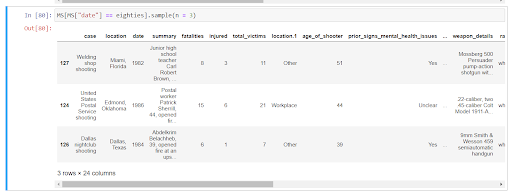

In [11]:
Image(filename='eighties_sample.png') 

In [12]:
MS[MS["date"] == nineties].sample(n = 3)

case                location  date  \
103     Westside Middle School killings     Jonesboro, Arkansas  1998   
105  Caltrans maintenance yard shooting      Orange, California  1997   
114               Watkins Glen killings  Watkins Glen, New York  1992   

                                               summary  fatalities injured  \
103  Mitchell Scott Johnson, 13, and Andrew Douglas...           5      10   
105  Former Caltrans employee Arturo Reyes Torres, ...           5       2   
114  John T. Miller, 50, killed four child-support ...           5       0   

    total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
103            15     School             11                               No   
105             7  Workplace             41                               No   
114             5      Other             50                              Yes   

     ...                                     weapon_details    race gender  \
103  ...  FIE 380, .380-caliber Star semiautomatic handg...   white   Male   
105  ...   7.62mm AK-47 Chinese variant semiautomatic rifle  Latino   Male   
114  ...                    9mm Llama semiautomatic handgun   white   Male   

                                               sources  \
103          http://www.vpc.org/studies/wgun980324.htm   
105  http://articles.latimes.com/1997/dec/20/news/m...   
114  http://www.nytimes.com/1992/10/17/nyregion/sho...   

                                 mental_health_sources  \
103  http://www.nytimes.com/1998/03/29/us/from-wild...   
105  http://articles.latimes.com/1997/dec/20/news/m...   
114  http://www.nytimes.com/1992/10/24/nyregion/wat...   

                                sources_additional_age    latitude  \
103  http://www.vpc.org/studies/wgun980324.htm; htt...  35.8209895   
105  http://articles.latimes.com/1997/dec/20/news/m...  33.7877944   
114  http://www.nytimes.com/1992/10/17/nyregion/sho...  42.3810555   

        longitude   type  year  
103   -90.6682606   Mass  1998  
105  -117.8531119  Spree  1997  
114   -76.8705777   Mass  1992  

[3 rows x 24 columns]

Events indexed for the 1990s decade:

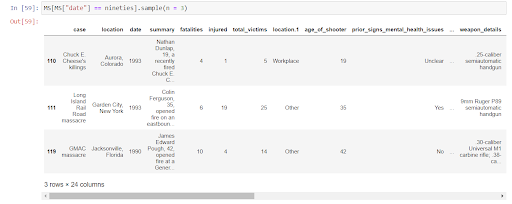

In [13]:
Image(filename='nineties_sample.png') 

In [14]:
MS[MS["date"] == thousands].sample(n = 3)

case                        location  date  \
95      Navistar shooting          Melrose Park, Illinois  2001   
88  Amish school shooting  Lancaster County, Pennsylvania  2006   
89  Capitol Hill massacre             Seattle, Washington  2006   

                                              summary  fatalities injured  \
95  Fired employee William D. Baker, 66, opened fi...           5       4   
88  Charles Carl Roberts, 32, shot 10 young girls ...           6       5   
89  Kyle Aaron Huff, 28, opened fire at a rave aft...           7       2   

   total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
95             9  Workplace             66                               No   
88            11     School             32                               No   
89             9      Other             28                               No   

    ...                                     weapon_details   race gender  \
95  ...  SKS 1954R, .30-caliber Winchester rifles; 12-g...  black   Male   
88  ...  Springfield semiautomatic handgun; .30-06 Ruge...  white   Male   
89  ...  .40-caliber Ruger, one other semiautomatic han...  white   Male   

                                              sources  \
95  http://articles.chicagotribune.com/2001-02-07/...   
88  http://news.google.com/newspapers?id=O8oyAAAAI...   
89  http://seattletimes.com/html/localnews/2002892...   

                                mental_health_sources  \
95  http://articles.chicagotribune.com/2001-02-07/...   
88  http://www.cnn.com/2006/US/10/03/amish.shootin...   
89  http://seattletimes.com/html/localnews/2002898...   

                               sources_additional_age   latitude   longitude  \
95  http://articles.chicagotribune.com/2001-02-07/...  41.908163  -87.879908   
88  http://news.google.com/newspapers?id=O8oyAAAAI...    39.9589    -76.0806   
89  http://seattletimes.com/html/localnews/2002892...    47.6229   -122.3165   

    type  year  
95  Mass  2001  
88  Mass  2006  
89  Mass  2006  

[3 rows x 24 columns]

Events indexed for the 2000s decade:

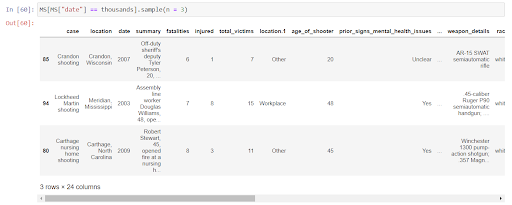

In [15]:
Image(filename='thousands_sample.png') 

In [16]:
MS[MS["date"] == tens].sample(n = 3)

case                  location  date  \
63                 Santa Monica rampage  Santa Monica, California  2013   
64  Pinewood Village Apartment shooting   Federal Way, Washington  2013   
27             Capital Gazette shooting       Annapolis, Maryland    18   

                                              summary  fatalities injured  \
63  John Zawahri, 23, armed with a homemade assaul...           6       3   
64  Dennis Clark III, 27, shot and killed his girl...           5       0   
27  Jarrod W. Ramos, 38, shot through the glass do...           5       2   

   total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
63             9    Other\n             23                              Yes   
64             5    Other\n             27                               No   
27             7  Workplace             38                                -   

    ...                                     weapon_details   race gender  \
63  ...  .223-caliber semi-automatic assault rifle, abo...  White   Male   
64  ...  .40 caliber semi-automatic handgun, pistol gri...  Black   Male   
27  ...                       12-gauge pump-action shotgun  White      M   

                                              sources  \
63  http://www.cbsnews.com/8301-504083_162-5758932...   
64  http://seattletimes.com/html/localnews/2020836...   
27  http://www.capitalgazette.com/news/annapolis/b...   

                                mental_health_sources  \
63  http://www.cbsnews.com/8301-504083_162-5758932...   
64                                                  -   
27                                                  -   

                               sources_additional_age    latitude  \
63  http://www.cbsnews.com/8301-504083_162-5758932...   34.008617   
64  http://seattletimes.com/html/localnews/2020836...  47.3129607   
27                                                  -   38.994548   

       longitude  type  year  
63   -118.494754  Mass  2013  
64  -122.3393665  Mass  2013  
27    -76.543657  Mass  2018  

[3 rows x 24 columns]

Events indexed for the 2010s decade:

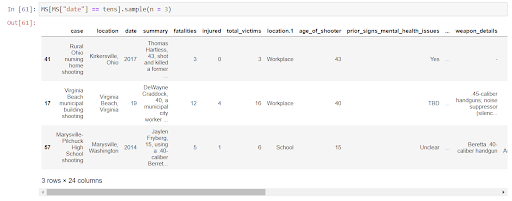

In [17]:
Image(filename='tens_sample.png') 

In [18]:
MS[MS["date"] == twenties].sample(n = 3)

case              location date  \
1   Buffalo supermarket massacre     Buffalo, New York   22   
10         Molson Coors shooting  Milwaukee, Wisconsin   20   
3    Oxford High School shooting      Oxford, Michigan   21   

                                              summary  fatalities injured  \
1   Payton S. Gendron, 18, committed a racially mo...          10       3   
10  Anthony Ferrill, 51, an employee armed with tw...           5       0   
3   Ethan Crumbley, a 15-year-old student at Oxfor...           4       7   

   total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
1             13  workplace             18                              yes   
10             5  Workplace             51                                -   
3             11     School             15                                -   

    ...                        weapon_details   race gender  \
1   ...  Bushmaster XM-15 semiautomatic rifle  White      M   
10  ...                                     -  Black      M   
3   ...                  Sig Sauer 9mm pistol      -      M   

                                              sources  \
1   https://www.nytimes.com/live/2022/05/15/nyregi...   
10  https://www.jsonline.com/story/news/local/2020...   
3   https://www.washingtonpost.com/nation/2021/11/...   

                                mental_health_sources sources_additional_age  \
1   https://www.nytimes.com/2022/05/15/nyregion/gu...                      -   
10                                                  -                      -   
3                                                   -                      -   

       latitude     longitude  type  year  
1             -             -  Mass  2022  
10    43.044511    -87.962537  Mass  2020  
3   42.84410784  -83.25992831  Mass  2021  

[3 rows x 24 columns]

Events indexed for the 2020s decade:

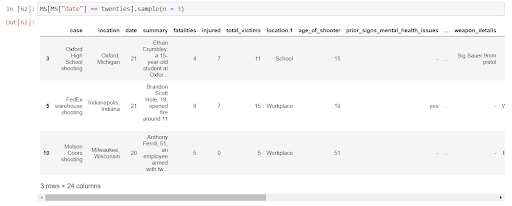

In [19]:
Image(filename='twenties_sample.png') 

We will then scrape articles that correspond to the events indexed and store the contents of each of the articles in a text file. We will then remove all of the punctuation and capitalization from the words to ensure that all words are lowercase, thus Dataset, dataset, and Data-set will all be counted as the same word for example. Then, we will save each of these modifications into a new object for their respective decade.

In [20]:
with open('twenties_media_punc.txt', 'r') as file:
    twenties_media_punc = file.read().rstrip()

In [21]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~â€™'''
twenties_media = ""
for char in twenties_media_punc:
   if char not in punctuations:
       twenties_media = twenties_media + char

In [22]:
twenties_media[0:101]

'in the days leading up to the oxford high school shooting tuesday rumors spread of something forebodi'

In [23]:
with open('tens_media_punc.txt', 'r') as file:
    tens_media_punc = file.read().rstrip()

In [24]:
tens_media = ""
for char in tens_media_punc:
   if char not in punctuations:
       tens_media = tens_media + char

In [25]:
tens_media[0:101]

'a shooter opened fire inside an ohio nursing home friday killing two employees and the towns brand ne'

In [26]:
with open('thousands_media_punc.txt', 'r') as file:
    thousands_media_punc = file.read().rstrip()

In [27]:
thousands_media = ""
for char in thousands_media_punc:
   if char not in punctuations:
       thousands_media = thousands_media + char

In [28]:
thousands_media[0:101]

'crandon wis ap the off duty sheriffs deputy who shot six people at a pizza party told a friend he had'

In [29]:
with open('nineties_media_punc.txt', 'r') as file:
    nineties_media_punc = file.read().rstrip()

In [30]:
nineties_media = ""
for char in nineties_media_punc:
   if char not in punctuations:
       nineties_media = nineties_media + char

In [31]:
nineties_media[0:101]

'jacksonville fla a man with a violent criminal record whose car had recently been repossessed sprayed'

In [32]:
with open('eighties_media_punc.txt', 'r') as file:
    eighties_media_punc = file.read().rstrip()

In [33]:
eighties_media = ""
for char in eighties_media_punc:
   if char not in punctuations:
       eighties_media = eighties_media + char

In [34]:
eighties_media[0:101]

'a man described by neighbors as quiet and eccentric entered a miami machine shop today killed eight p'

We will now create a Tf-idf vectorizer to count only the words that are significant within each of the text files.

In [35]:
corpus = [eighties_media, nineties_media, thousands_media, tens_media, twenties_media]

In [36]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)

In [37]:
X = vectorizer.fit_transform(corpus)

In [38]:
feature_names = vectorizer.get_feature_names_out()

In [39]:
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

10       100  100year      1039      1041      1043      1049  \
0  0.000000  0.013632   0.0000  0.000000  0.000000  0.000000  0.000000   
1  0.017874  0.000000   0.0000  0.000000  0.000000  0.000000  0.000000   
2  0.029601  0.014801   0.0221  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000   0.0000  0.026408  0.026408  0.026408  0.026408   
4  0.018537  0.009268   0.0000  0.000000  0.000000  0.000000  0.000000   

         11     110      1100  ...  yesterdays      york   young   younger  \
0  0.013632  0.0000  0.000000  ...    0.000000  0.000000  0.0000  0.000000   
1  0.017874  0.0000  0.000000  ...    0.000000  0.106757  0.0000  0.000000   
2  0.014801  0.0221  0.000000  ...    0.000000  0.000000  0.0221  0.000000   
3  0.000000  0.0000  0.026408  ...    0.026408  0.000000  0.0000  0.000000   
4  0.000000  0.0000  0.000000  ...    0.000000  0.000000  0.0000  0.013839   

      youre  youthrelated   youtube    ysidro    zander  zendzian  
0  0.016422      0.000000  0.000000  0.020355  0.000000    0.0000  
1  0.000000      0.026689  0.000000  0.000000  0.000000    0.0000  
2  0.035660      0.000000  0.000000  0.000000  0.000000    0.0221  
3  0.000000      0.000000  0.026408  0.000000  0.000000    0.0000  
4  0.000000      0.000000  0.000000  0.000000  0.013839    0.0000  

[5 rows x 2706 columns]

In [40]:
data = df.transpose()
data.columns = ['eighties_media', 'nineties_media', 'thousands_media', 'tens_media', 'twenties_media']
data.head()

eighties_media  nineties_media  thousands_media  tens_media  \
10             0.000000        0.017874         0.029601    0.000000   
100            0.013632        0.000000         0.014801    0.000000   
100year        0.000000        0.000000         0.022100    0.000000   
1039           0.000000        0.000000         0.000000    0.026408   
1041           0.000000        0.000000         0.000000    0.026408   

         twenties_media  
10             0.018537  
100            0.009268  
100year        0.000000  
1039           0.000000  
1041           0.000000

With a Tf-idf vectorizer created, we will now create a wordcloud based on the frequency data from the vectorizer. By adjusting the color settings, we can create a unique word cloud for each of the five decades as seen in the article.

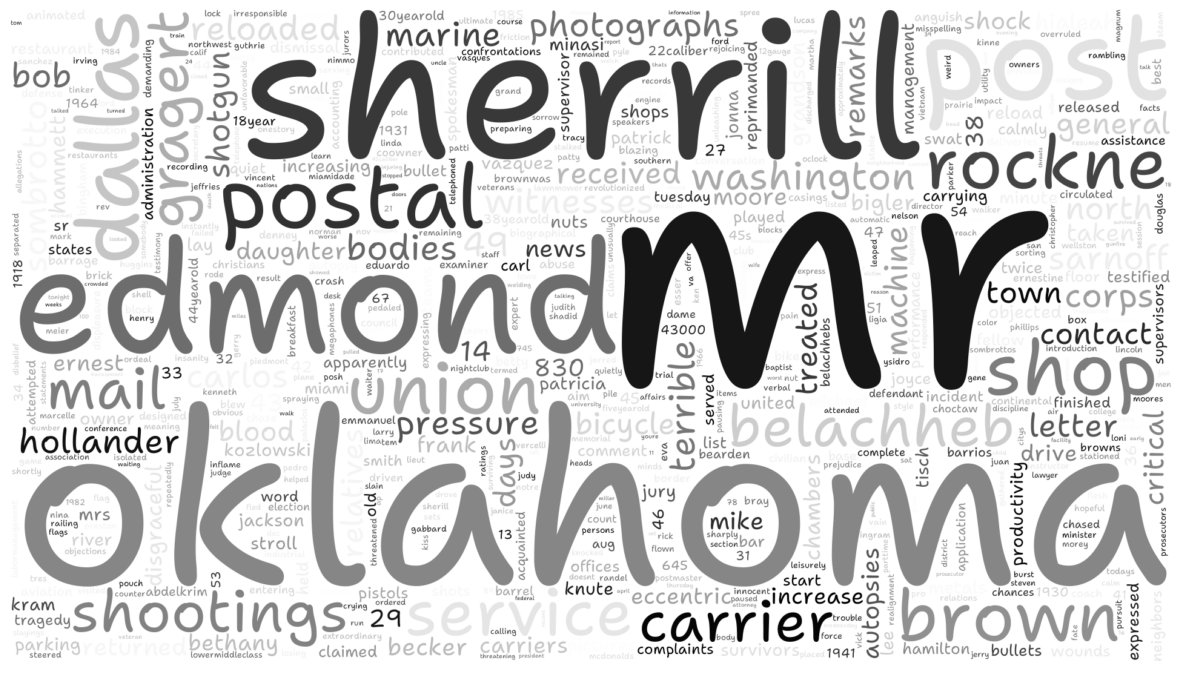

In [41]:
wordcloud = WordCloud(
    font_path = r"C:\Users\chris\Data Science\Data Science Projects\Shootings - Logistical Regression\static\ShantellSans-Regular.ttf",
    width = 1920,
    height = 1080,
    max_words = 750,
    background_color = 'white',
    colormap = 'Greys',
    ).generate_from_frequencies(data['eighties_media'])
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

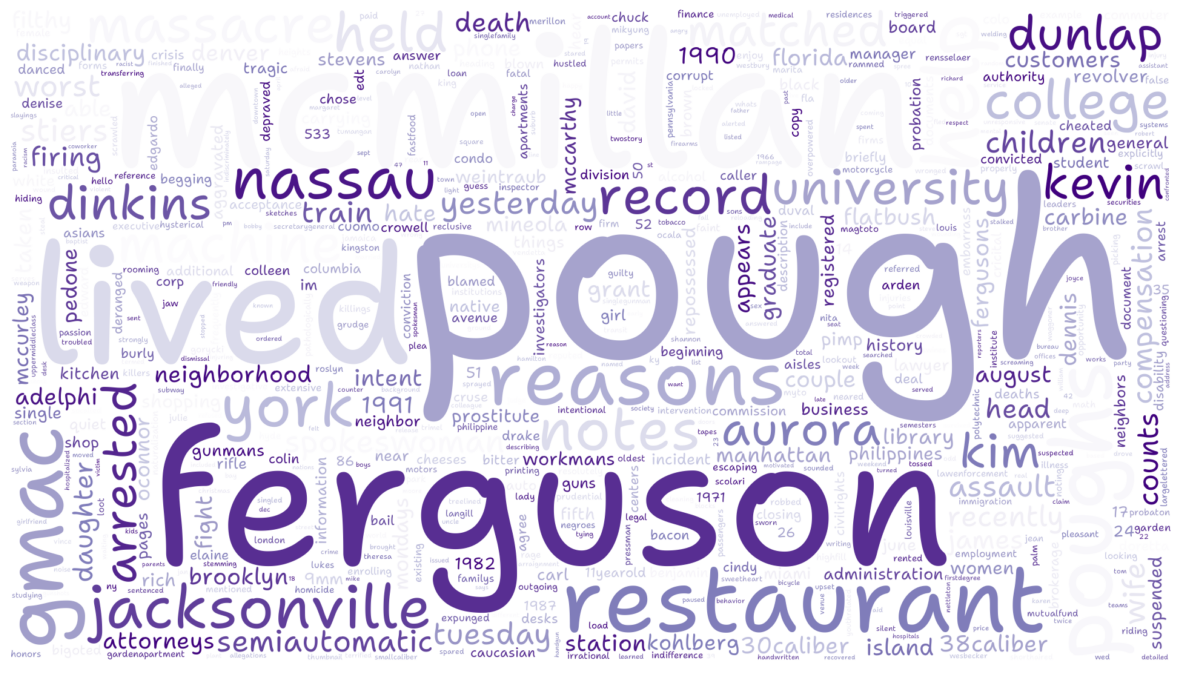

In [42]:
wordcloud = WordCloud(
    font_path = r"C:\Users\chris\Data Science\Data Science Projects\Shootings - Logistical Regression\static\ShantellSans-Regular.ttf",
    width = 1920,
    height = 1080,
    max_words = 750,
    background_color = 'white',
    colormap = 'Purples',
    ).generate_from_frequencies(data['nineties_media'])
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

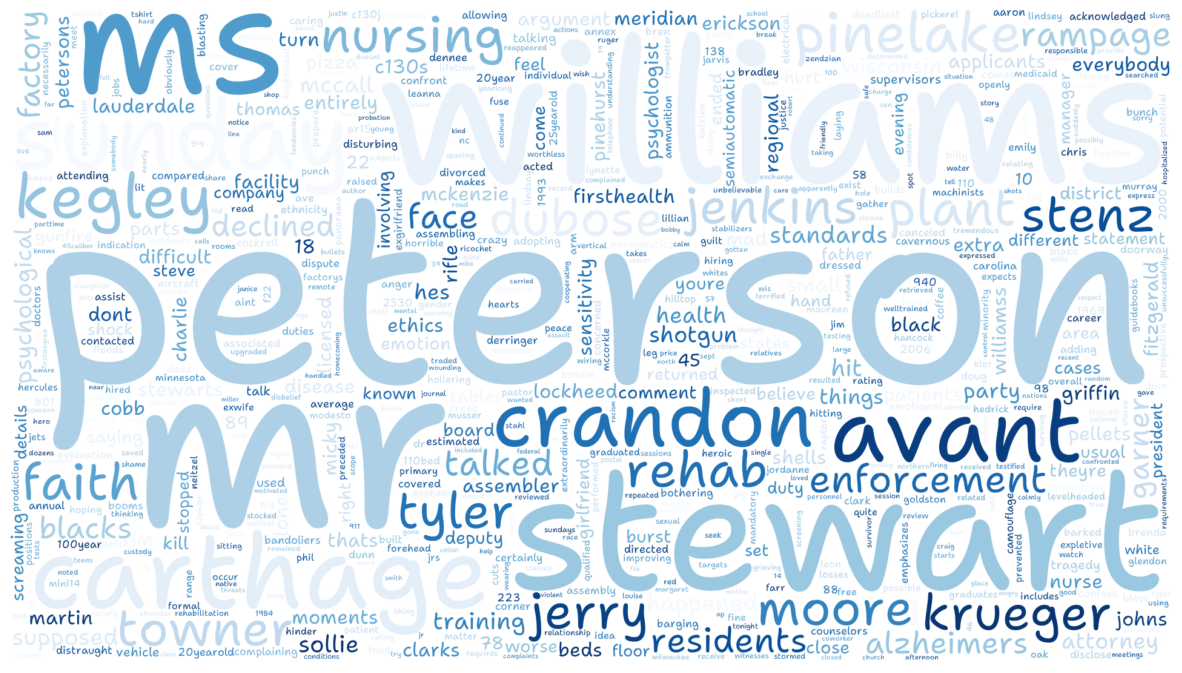

In [43]:
wordcloud = WordCloud(
    font_path = r"C:\Users\chris\Data Science\Data Science Projects\Shootings - Logistical Regression\static\ShantellSans-Regular.ttf",
    width = 1920,
    height = 1080,
    max_words = 750,
    background_color = 'white',
    colormap = 'Blues',
    ).generate_from_frequencies(data['thousands_media'])
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

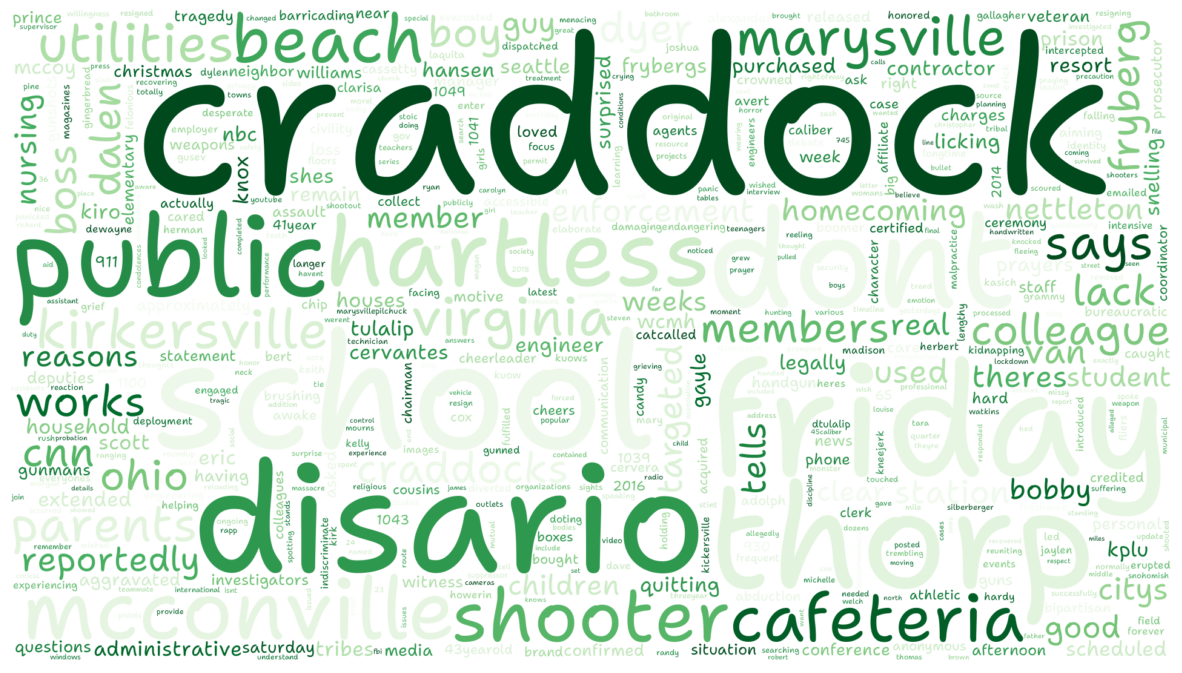

In [44]:
wordcloud = WordCloud(
    font_path = r"C:\Users\chris\Data Science\Data Science Projects\Shootings - Logistical Regression\static\ShantellSans-Regular.ttf",
    width = 1920,
    height = 1080,
    max_words = 750,
    background_color = 'white',
    colormap = 'Greens',
    ).generate_from_frequencies(data['tens_media'])
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

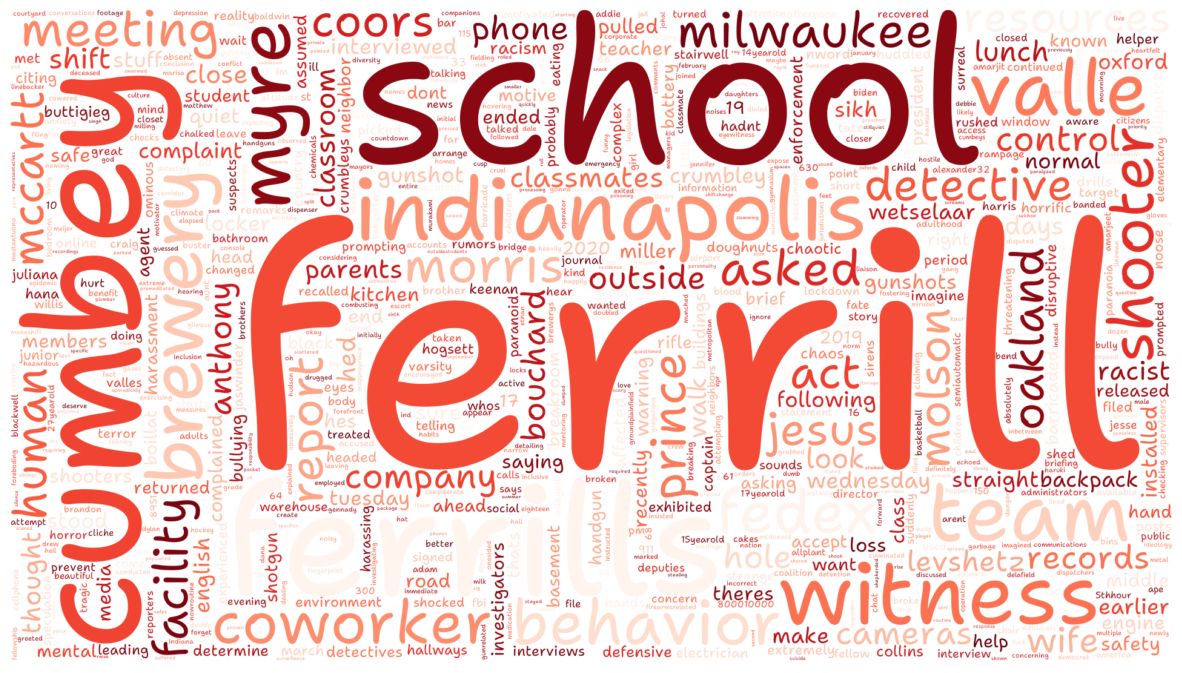

In [45]:
wordcloud = WordCloud(
    font_path = r"C:\Users\chris\Data Science\Data Science Projects\Shootings - Logistical Regression\static\ShantellSans-Regular.ttf",
    width = 1920,
    height = 1080,
    max_words = 750,
    background_color = 'white',
    colormap = 'Reds',
    ).generate_from_frequencies(data['twenties_media'])
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()